<a href="https://colab.research.google.com/github/toraaglobal/Case_Studies/blob/master/DRT_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
print(os.listdir('./'))

from google.colab import drive
drive.mount('/content/drive')

os.chdir('./drive/My Drive/Colab Notebooks')

['.config', 'drive', 'sample_data']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pyLDAvis

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 30 19:25:40 2019

@author: teeja
"""

## Packages
import pandas as pd
import os
import numpy as np
np.random.seed(2018)
from argparse import ArgumentParser
import pyLDAvis.sklearn as LDAvis
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
import time
import nltk.stem

## slearn
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

start = time.time()
## eglish stemmer
english_stemmer = nltk.stem.SnowballStemmer('english')

## class to tem and vectorized doc
class StemmedCountVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])
    
## implement a print function 
## REF: https://nlpforhackers.io/topic-modeling/
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
    
    
##  stem vectorizer
stem_tfidf_vectorizer = StemmedCountVectorizer(input="content",encoding='latin-1', binary=False, min_df=5, 
                                              stop_words='english',ngram_range=(1,2), analyzer="word",
                                              token_pattern='(?ui)\\b\\w*[a-z]+\\w*\\b')


path = "data/DRT/ouryelpreviews.csv"
review = pd.read_csv(path, sep='|')
print(review.head())

## extract the review from the dataframe
text =  review['text'].values

print("The length of the file - or number of docs is", len(text))
print(text[:5])


## buid the model
num = 3  # initial number of topics
myvec = stem_tfidf_vectorizer.fit_transform(text)
# feature names
myvecfeature = stem_tfidf_vectorizer.get_feature_names()
vectDF = pd.DataFrame(myvec.toarray(),columns= myvecfeature)
print(vectDF.head())
## model
lda_model = LatentDirichletAllocation(n_components=num, max_iter=10, learning_method='online')
# fit the model
LDA = lda_model.fit_transform(myvec)
print("SIZE: ", LDA.shape) 
## print
print_topics(lda_model,stem_tfidf_vectorizer)

## viz
panel = LDAvis.prepare(lda_model, myvec, stem_tfidf_vectorizer, mds='tsne')
#pyLDAvis.show(panel)
vizname = 'lda_DRT_yelp_review' + '.html'
pyLDAvis.save_html(panel,vizname)

end = time.time()

print("Total Time: {}".format(end-start))


   Unnamed: 0  ...                 date
0           0  ...  2017-01-14 21:30:33
1           0  ...  2012-02-29 21:52:43
2           0  ...  2017-12-15 23:27:08
3           0  ...  2013-12-28 22:28:08
4           0  ...  2014-06-27 21:32:31

[5 rows x 7 columns]
The length of the file - or number of docs is 1042847
["I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level! Travis's greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit.  Next comes the most relaxing and incredible shampoo -- where you get a full head message that could cure even the very worst migraine in minutes --- and the scented shampoo room.  Travis has freakishly strong fingers (in a good way) and use the perfect amount of pressure.  That was superb!  Then starts the glorious blowout.

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/DRT/ouryelpreviews.csv"
review = pd.read_csv(path, sep='|')
print(review.head())

   Unnamed: 0  ...                 date
0           0  ...  2017-01-14 21:30:33
1           0  ...  2012-02-29 21:52:43
2           0  ...  2017-12-15 23:27:08
3           0  ...  2013-12-28 22:28:08
4           0  ...  2014-06-27 21:32:31

[5 rows x 7 columns]


In [0]:
review.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars', 'text',
       'date'],
      dtype='object')

In [0]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042847 entries, 0 to 1042846
Data columns (total 7 columns):
Unnamed: 0     1042847 non-null int64
review_id      1042847 non-null object
user_id        1042847 non-null object
business_id    1042847 non-null object
stars          1042847 non-null float64
text           1042847 non-null object
date           1042847 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 55.7+ MB


In [0]:
## load the pickle objects
import pickle

vectorizer =pickle.load(open('code/SVM-model-for-sentiment-classification-in-review-vectorizer.sav', 'rb'))

model = pickle.load(open('code/SVM-model-for-sentiment-classification-in-reviews.sav', 'rb'))


In [0]:
## function for negative detection
import re

def has_negation(post):
    pattern_neg_1 = re.compile(r'\b(not|no|never)\b')
    pattern_neg_2 = re.compile(r'\b([a-z]+less)\b')
    if pattern_neg_1.search(post.lower()) or pattern_neg_2.search(post.lower()):
        return 1
    else: 
        return 0
      
      

      
      
from scipy import sparse


pattern_neg = re.compile(r'\b(not|no|never)\b')
review['neg'] = review['text'].apply(lambda x: 1 if pattern_neg.search(x.lower()) else 0)

X_dense = review[['neg']]
X_sparse =vectorizer.transform(review['text']).astype(float)
X = sparse.hstack([X_sparse, X_dense]).tocsr()


review['sentiment'] = model.predict(X)



In [0]:

## 
bnb_vec = pickle.load(open('code/BNB-model-for-lie-detection-in-review-vectorizer.sav','rb'))

bnb_model = pickle.load(open('code/BNB-model-for-lie-detection-in-reviews.sav', 'rb'))


vec = bnb_vec.transform(review['text'])

review['lie'] = bnb_model.predict(vec)

review.info()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator BernoulliNB from version 0.21.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042847 entries, 0 to 1042846
Data columns (total 10 columns):
Unnamed: 0     1042847 non-null int64
review_id      1042847 non-null object
user_id        1042847 non-null object
business_id    1042847 non-null object
stars          1042847 non-null float64
text           1042847 non-null object
date           1042847 non-null object
neg            1042847 non-null int64
lie            1042847 non-null object
sentiment      1042847 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 79.6+ MB


In [0]:
review.head()

,Unnamed: 0,review_id,user_id,business_id,stars,text,date,neg,lie,sentiment
0,0,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1,t,p
1,0,RS_GTIT6836bCaPy637kNQ,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,It's a giant Best Buy with 66 registers. I do...,2012-02-29 21:52:43,0,t,p
2,0,-I5umRTkhw15RqpKMl_o1Q,-mA3-1mN4JIEkqOtdbNXCQ,mRUVMJkUGxrByzMQ2MuOpA,1.0,"Walked in around 4 on a Friday afternoon, we s...",2017-12-15 23:27:08,1,t,p
3,0,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,their pettuccine was fresh-made in the morning...,2013-12-28 22:28:08,0,t,p
4,0,bjD0Dqn3k-fi00BXatrytg,1fi6x4tnJtlVWaJmoIO9XA,XTzKRvWciP_BZ9imk8mmPQ,1.0,I tried this place because my girls are away f...,2014-06-27 21:32:31,1,f,n


In [0]:
review.to_csv('data/DRT/our_review_with_with_sentiment.csv')

In [0]:
import pandas as pd

review = pd.read_csv('data/DRT/our_review_with_with_sentiment.csv')
review.head()

,Unnamed: 0,Unnamed: 0.1,review_id,user_id,business_id,stars,text,date,neg,lie,sentiment
0,0,0,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1,t,p
1,1,0,RS_GTIT6836bCaPy637kNQ,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,It's a giant Best Buy with 66 registers. I do...,2012-02-29 21:52:43,0,t,p
2,2,0,-I5umRTkhw15RqpKMl_o1Q,-mA3-1mN4JIEkqOtdbNXCQ,mRUVMJkUGxrByzMQ2MuOpA,1.0,"Walked in around 4 on a Friday afternoon, we s...",2017-12-15 23:27:08,1,t,p
3,3,0,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,their pettuccine was fresh-made in the morning...,2013-12-28 22:28:08,0,t,p
4,4,0,bjD0Dqn3k-fi00BXatrytg,1fi6x4tnJtlVWaJmoIO9XA,XTzKRvWciP_BZ9imk8mmPQ,1.0,I tried this place because my girls are away f...,2014-06-27 21:32:31,1,f,n


In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## function to generate word cloud

def generate_wordcloud(text, max_font_size=80, max_words=100, background_color="white"):
    '''generate word cloud from text '''
    wordcloud = WordCloud(max_font_size=max_font_size, max_words=max_words, background_color=background_color).generate(text)
    #display generated image
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #figname = str(text) + '.png'
    #plt.savefig(figname)
    plt.show()

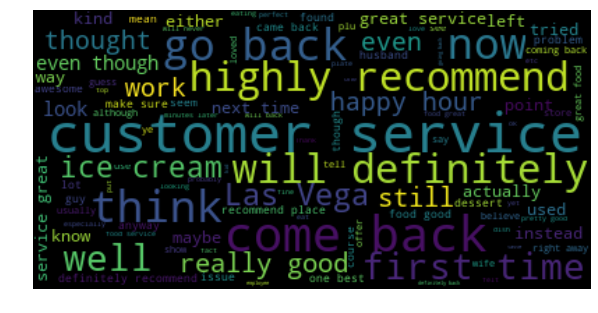

In [0]:
#create a wordclod of the false text
ftext = ''

#deception['newreview'][1]

for i in range(len(review)):
  if review['lie'][i] == 'f':
    ftext = ftext + review['text'][i]
    
    
    
generate_wordcloud(ftext,background_color='black')

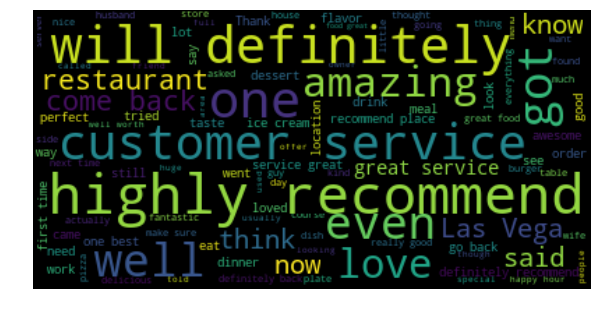

In [0]:
#create a wordclod of the False review with 5 stars
ttext = ''

#deception['newreview'][1]

for i in range(len(review)):
  if (review['lie'][i] == 'f') & (review['stars'][i] == 5.0):
    ttext = ttext + review['text'][i]
    
    
    
generate_wordcloud(ttext,background_color='black')

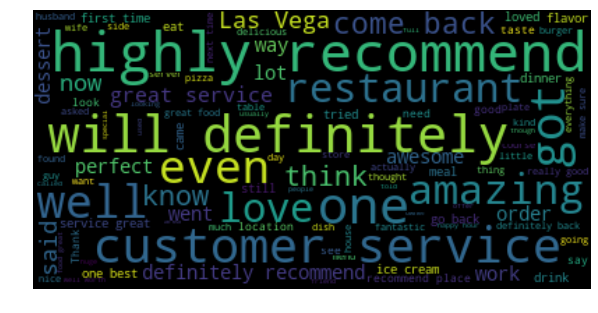

In [0]:
#create a wordclod of the True review with 5 stars
ttext = ''

#deception['newreview'][1]

for i in range(len(review)):
  if (review['lie'][i] == 'f') & (review['stars'][i] == 5.0):
    ttext = ttext + review['text'][i]
    
    
    
generate_wordcloud(ttext,background_color='black')

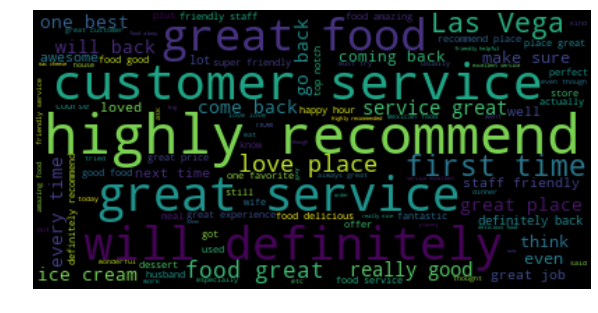

In [0]:
#create a wordclod of the positive review with 5 stars
ttext = ''


for i in range(len(review)):
  if (review['sentiment'][i] == 'p') & (review['stars'][i] == 5.0):
    ttext = ttext + review['text'][i]
    
    
    
generate_wordcloud(ttext,background_color='black')

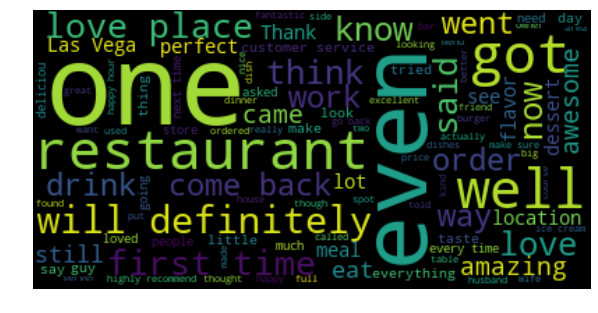

In [0]:
#create a wordclod of the negative review with 5 stars
ttext = ''


for i in range(len(review)):
  if (review['sentiment'][i] == 'n') & (review['stars'][i] == 5.0):
    ttext = ttext + review['text'][i]
    
    
    
generate_wordcloud(ttext,background_color='black')

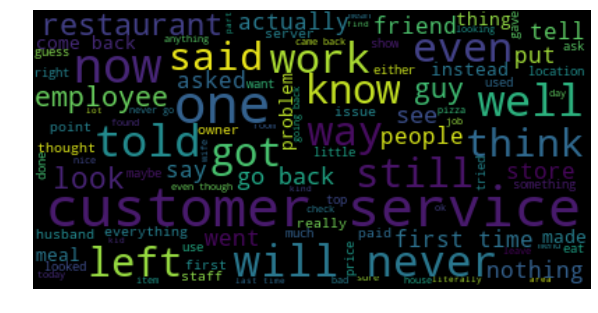

In [0]:
#create a wordclod of the negative review with 1 stars
ttext = ''


for i in range(len(review)):
  if (review['sentiment'][i] == 'n') & (review['stars'][i] == 1.0):
    ttext = ttext + review['text'][i]
    
    
    
generate_wordcloud(ttext,background_color='black')

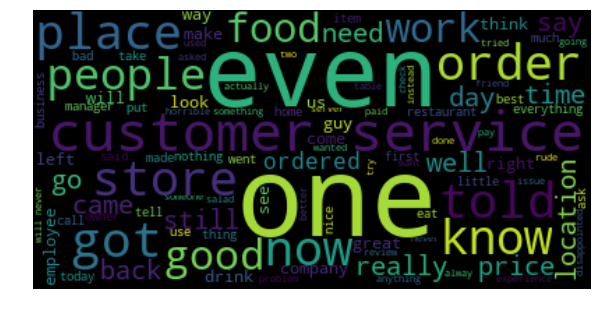

In [0]:
#create a wordclod of the positive review with 1 stars
ttext = ''


for i in range(len(review)):
  if (review['sentiment'][i] == 'p') & (review['stars'][i] == 1.0):
    ttext = ttext + review['text'][i]
    
    
    
generate_wordcloud(ttext,background_color='black')

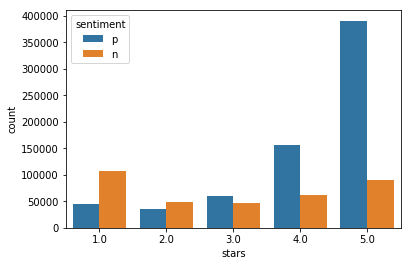

In [0]:
sns.countplot(review['stars'], hue=review['sentiment'])

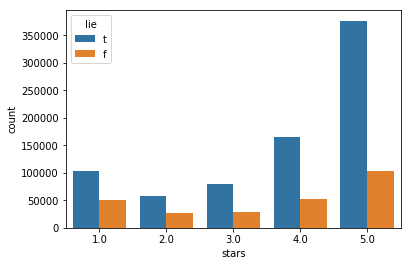

In [0]:
sns.countplot(review['stars'], hue=review['lie'])

In [0]:
## 

business_path = 'data/DRT/ourbusinesses.csv'

business = pd.read_csv(business_path, sep='|', encoding='latin-1')

business.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,IsRestaurants,IsShopping,IsFood,IsHomeservices,IsBeautyspas
0,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"restaurants, breakfast & brunch, mexican, taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016.0,18,3.0,AZ,True,False,False,False,False
1,17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"restaurants, italian",Las Vegas,NaN,0,36.100016,-115.128528,Carluccio's Tivoli Gardens,89119.0,40,4.0,NV,True,False,False,False,False
2,30,8800 W Charleston Blvd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",LB6ZyCfUzeX9OLdunHhnOQ,"shopping, home & garden, department stores, me...",Las Vegas,"{'Monday': '9:0-23:0', 'Tuesday': '9:0-23:0', ...",1,36.161805,-115.287277,Ross Dress for Less,89117.0,38,3.5,NV,False,True,False,False,False
3,34,3150 N Rainbow Blvd,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",HVPcIcqiJkrpD36xZFGN6g,"home services, real estate, financial services...",Las Vegas,NaN,1,36.216667,-115.242027,Bank of America,89108.0,19,1.5,NV,False,False,False,True,False
4,36,15224 N 59th Ave,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...",0_ohldeFwysbglrTLSGM4Q,"beauty & spas, barbers",Glendale,"{'Tuesday': '9:0-17:0', 'Wednesday': '9:0-17:0...",0,33.623871,-112.186448,The Lounge Barber Shop,85306.0,6,3.5,AZ,False,False,False,False,True


In [0]:
## merge reviewand businesses
bizandreview = review.merge(business, how='inner', left_on='business_id', right_on='business_id',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
bizandreview.head()

,Unnamed: 0_x,Unnamed: 0.1,review_id,user_id,business_id,stars_x,text,date,neg,lie,sentiment,Unnamed: 0_y,address,attributes,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_y,state,IsRestaurants,IsShopping,IsFood,IsHomeservices,IsBeautyspas
0,557834,0,D7OKYPWggteMDmvr6ECDlg,NS2OQzrmJYHRXboibOYFDA,--9QQLMTbFzLJ_oT-ON3Xw,5.0,Always great customer service. Affordable hair...,2013-08-18 00:34:48,0,t,p,110261,"1835 E Guadalupe Rd, Ste 106","{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","beauty & spas, hair salons",Tempe,NaN,1,33.362813,-111.908995,Great Clips,85283.0,12,3.5,AZ,False,False,False,False,True
1,559656,0,vbDsxZPiLkIa8wWNIVS02g,zLtVHO6mfoRhx_6kZ3jJ2Q,--9QQLMTbFzLJ_oT-ON3Xw,5.0,"If you want a man's or boy's cut, see Cameron....",2017-05-02 03:39:58,0,t,n,110261,"1835 E Guadalupe Rd, Ste 106","{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","beauty & spas, hair salons",Tempe,NaN,1,33.362813,-111.908995,Great Clips,85283.0,12,3.5,AZ,False,False,False,False,True
2,561203,0,nfFUKhCC6KIJcl6bITF2iw,ZPspeNuGDw5PYcu0ma02jA,--9QQLMTbFzLJ_oT-ON3Xw,2.0,Went to this location to get a quick trim . As...,2016-04-02 01:35:46,1,t,p,110261,"1835 E Guadalupe Rd, Ste 106","{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","beauty & spas, hair salons",Tempe,NaN,1,33.362813,-111.908995,Great Clips,85283.0,12,3.5,AZ,False,False,False,False,True
3,564583,0,KbpbhF0PEak1tKBRkWTncQ,mfdb2wCYv7yiu0fyzFKMBg,--9QQLMTbFzLJ_oT-ON3Xw,3.0,My husband and son just came home from getting...,2016-08-27 17:32:54,1,t,n,110261,"1835 E Guadalupe Rd, Ste 106","{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","beauty & spas, hair salons",Tempe,NaN,1,33.362813,-111.908995,Great Clips,85283.0,12,3.5,AZ,False,False,False,False,True
4,565149,0,ti_L5vaHspbNnky7yHnNww,5RLxzxLIY3ZXUUksr_dtXA,--9QQLMTbFzLJ_oT-ON3Xw,4.0,Pretty decent Great Clips location. Usually no...,2013-05-15 09:20:14,1,t,p,110261,"1835 E Guadalupe Rd, Ste 106","{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","beauty & spas, hair salons",Tempe,NaN,1,33.362813,-111.908995,Great Clips,85283.0,12,3.5,AZ,False,False,False,False,True


In [0]:
bizandreview.to_csv("data/DRT/reviewandbusiness.csv")

In [4]:
import pandas as pd
bizreview = pd.read_csv("data/DRT/reviewandbusiness.csv")
bizreview.head()

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1,review_id,user_id,business_id,stars_x,text,date,neg,lie,sentiment,Unnamed: 0_y,address,attributes,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_y,state,IsRestaurants,IsShopping,IsFood,IsHomeservices,IsBeautyspas
0,0,557834,0,D7OKYPWggteMDmvr6ECDlg,NS2OQzrmJYHRXboibOYFDA,--9QQLMTbFzLJ_oT-ON3Xw,5.0,Always great customer service. Affordable hair...,2013-08-18 00:34:48,0,t,p,110261,"1835 E Guadalupe Rd, Ste 106","{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","beauty & spas, hair salons",Tempe,NaN,1,33.362813,-111.908995,Great Clips,85283.0,12,3.5,AZ,False,False,False,False,True
1,1,559656,0,vbDsxZPiLkIa8wWNIVS02g,zLtVHO6mfoRhx_6kZ3jJ2Q,--9QQLMTbFzLJ_oT-ON3Xw,5.0,"If you want a man's or boy's cut, see Cameron....",2017-05-02 03:39:58,0,t,n,110261,"1835 E Guadalupe Rd, Ste 106","{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","beauty & spas, hair salons",Tempe,NaN,1,33.362813,-111.908995,Great Clips,85283.0,12,3.5,AZ,False,False,False,False,True
2,2,561203,0,nfFUKhCC6KIJcl6bITF2iw,ZPspeNuGDw5PYcu0ma02jA,--9QQLMTbFzLJ_oT-ON3Xw,2.0,Went to this location to get a quick trim . As...,2016-04-02 01:35:46,1,t,p,110261,"1835 E Guadalupe Rd, Ste 106","{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","beauty & spas, hair salons",Tempe,NaN,1,33.362813,-111.908995,Great Clips,85283.0,12,3.5,AZ,False,False,False,False,True
3,3,564583,0,KbpbhF0PEak1tKBRkWTncQ,mfdb2wCYv7yiu0fyzFKMBg,--9QQLMTbFzLJ_oT-ON3Xw,3.0,My husband and son just came home from getting...,2016-08-27 17:32:54,1,t,n,110261,"1835 E Guadalupe Rd, Ste 106","{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","beauty & spas, hair salons",Tempe,NaN,1,33.362813,-111.908995,Great Clips,85283.0,12,3.5,AZ,False,False,False,False,True
4,4,565149,0,ti_L5vaHspbNnky7yHnNww,5RLxzxLIY3ZXUUksr_dtXA,--9QQLMTbFzLJ_oT-ON3Xw,4.0,Pretty decent Great Clips location. Usually no...,2013-05-15 09:20:14,1,t,p,110261,"1835 E Guadalupe Rd, Ste 106","{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","beauty & spas, hair salons",Tempe,NaN,1,33.362813,-111.908995,Great Clips,85283.0,12,3.5,AZ,False,False,False,False,True


In [0]:
#bizreview.head(25)

In [5]:

## select subset where state = AZ and isRestaurant = True

biz_AZ = bizreview[(bizreview['IsRestaurants'] == True ) & ( bizreview['state'] == 'AZ') ]

biz_AZ.shape

(303930, 31)

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 30 13:05:37 2019

@author: teeja

LDA for Topic Modeling

Analyze the main topics in the floor debate of the 110th Congress (House only).
The data set “110” consists of four subfolders. For the subfolder names,
“m” means “male”, “f” means “female”, “d” means “democrat”, “r” means “republican”
"""

## Packages
import pandas as pd
import os
import numpy as np
np.random.seed(2018)
from argparse import ArgumentParser
import pyLDAvis.sklearn as LDAvis
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
import time
import nltk.stem

## slearn
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

start = time.time()
## eglish stemmer
english_stemmer = nltk.stem.SnowballStemmer('english')

## class to tem and vectorized doc
class StemmedCountVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])
    
    
## implement a print function 
## REF: https://nlpforhackers.io/topic-modeling/
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
    
    
##  stem vectorizer
stem_tfidf_vectorizer = StemmedCountVectorizer(input="content",encoding='latin-1', binary=False, min_df=5, 
                                              stop_words='english',ngram_range=(1,2), analyzer="word",
                                              token_pattern='(?ui)\\b\\w*[a-z]{4,}\\w*\\b', max_features =2000)




## check some of the content of allfiles
##print(allfilenames[:5])

alltext = biz_AZ['text'].values


## buid the model
num = 3  # initial number of topics based on literature
myvec = stem_tfidf_vectorizer.fit_transform(alltext)
# feature names
myvecfeature = stem_tfidf_vectorizer.get_feature_names()
vectDF = pd.DataFrame(myvec.toarray(),columns= myvecfeature)
print(vectDF.head())
## model
lda_model = LatentDirichletAllocation(n_components=num, max_iter=10, learning_method='online')
# fit the model
LDA = lda_model.fit_transform(myvec)
print("SIZE: ", LDA.shape) 
## print
print_topics(lda_model,stem_tfidf_vectorizer)

## viz
panel = LDAvis.prepare(lda_model, myvec, stem_tfidf_vectorizer, mds='tsne')
#pyLDAvis.show(panel)
vizname = 'AZ_Restaurant_Reviews' + '.html'
pyLDAvis.save_html(panel,vizname)

end = time.time()

print("Total Time: {}".format(end-start))

   abl  absolut  absolutely delici  absolutely lov  ...  yummi  zero  zipp  zucchini
0  0.0      0.0                0.0             0.0  ...    0.0   0.0   0.0       0.0
1  0.0      0.0                0.0             0.0  ...    0.0   0.0   0.0       0.0
2  0.0      0.0                0.0             0.0  ...    0.0   0.0   0.0       0.0
3  0.0      0.0                0.0             0.0  ...    0.0   0.0   0.0       0.0
4  0.0      0.0                0.0             0.0  ...    0.0   0.0   0.0       0.0

[5 rows x 2000 columns]
SIZE:  (303930, 3)
Topic 0:
[('order', 5879.865512005038), ('time', 5172.435677204591), ('food', 4794.8207765987745), ('wait', 4083.0258618199696), ('pizza', 3668.693246181063), ('just', 3636.1512874552036), ('servic', 3564.243459555907), ('tabl', 3529.9331098780567), ('place', 3182.939023525159), ('minut', 3149.8644893693913)]
Topic 1:
[('chicken', 5363.471319924029), ('good', 5042.6826790814275), ('fri', 4082.9991129968175), ('sauc', 4000.855366862307), ('sal

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Total Time: 1077.7684423923492


In [7]:

## NV Restaurant


## select subset where state = AZ and isRestaurant = True

biz_NV = bizreview[(bizreview['IsRestaurants'] == True ) & ( bizreview['state'] == 'NV') ]

biz_NV.shape




(309184, 31)

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 30 13:05:37 2019

@author: teeja

LDA for Topic Modeling

Analyze the main topics in the floor debate of the 110th Congress (House only).
The data set “110” consists of four subfolders. For the subfolder names,
“m” means “male”, “f” means “female”, “d” means “democrat”, “r” means “republican”
"""

## Packages
import pandas as pd
import os
import numpy as np
np.random.seed(2018)
from argparse import ArgumentParser
import pyLDAvis.sklearn as LDAvis
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
import time
import nltk.stem

## slearn
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

start = time.time()
## eglish stemmer
english_stemmer = nltk.stem.SnowballStemmer('english')

## class to tem and vectorized doc
class StemmedCountVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])
    
    
## implement a print function 
## REF: https://nlpforhackers.io/topic-modeling/
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
    
    
##  stem vectorizer
stem_tfidf_vectorizer = StemmedCountVectorizer(input="content",encoding='latin-1', binary=False, min_df=5, 
                                              stop_words='english',ngram_range=(1,2), analyzer="word",
                                              token_pattern='(?ui)\\b\\w*[a-z]{4,}\\w*\\b', max_features =2000)




## check some of the content of allfiles
##print(allfilenames[:5])

alltext2 = biz_NV['text'].values


## buid the model
num = 3  # initial number of topics based on literature
myvec = stem_tfidf_vectorizer.fit_transform(alltext2)
# feature names
myvecfeature = stem_tfidf_vectorizer.get_feature_names()
vectDF = pd.DataFrame(myvec.toarray(),columns= myvecfeature)
print(vectDF.head())
## model
lda_model = LatentDirichletAllocation(n_components=num, max_iter=10, learning_method='online')
# fit the model
LDA = lda_model.fit_transform(myvec)
print("SIZE: ", LDA.shape) 
## print
print_topics(lda_model,stem_tfidf_vectorizer)

## viz
panel = LDAvis.prepare(lda_model, myvec, stem_tfidf_vectorizer, mds='tsne')
#pyLDAvis.show(panel)
vizname = 'NV_Restaurant_Reviews' + '.html'
pyLDAvis.save_html(panel,vizname)

end = time.time()

print("Total Time: {}".format(end-start))

   abl  absolut  absolutely amaz  ...  young  yummi  zero
0  0.0      0.0              0.0  ...    0.0    0.0   0.0
1  0.0      0.0              0.0  ...    0.0    0.0   0.0
2  0.0      0.0              0.0  ...    0.0    0.0   0.0
3  0.0      0.0              0.0  ...    0.0    0.0   0.0
4  0.0      0.0              0.0  ...    0.0    0.0   0.0

[5 rows x 2000 columns]
SIZE:  (309184, 3)
Topic 0:
[('order', 5495.019107676965), ('food', 4787.837729107828), ('time', 4674.090915095842), ('wait', 4615.786519517585), ('just', 3839.811311193147), ('place', 3399.6739253386418), ('like', 3311.570218663148), ('servic', 3266.8092759882006), ('tabl', 3189.6729349848024), ('minut', 3177.276806673324)]
Topic 1:
[('great', 8646.052046249015), ('food', 7580.700784224426), ('place', 6341.0185529523005), ('servic', 5696.467295576867), ('good', 4730.387477645667), ('love', 4496.995694903549), ('friend', 4125.705894041009), ('amaz', 3957.8301525598854), ('best', 3577.5348685628596), ('sushi', 3550.97039

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Total Time: 1171.59858751297
